# Community detection

- Write a Python function implementing the Girvan-Newman algorithm to find the community structure of a graph (see: https://arxiv.org/abs/cond-mat/0112110)
    
- Test your function on the famous Zachary Karate Club network.
    
- Display the network with color-coded nodes according to the communities found by the algorithm

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
import networkx as nx

In [20]:
import networkx.algorithms.centrality as nc

In [21]:
from operator import itemgetter

## The Karate Club is so important that NetworkX has a function to import it

In [22]:
G = nx.karate_club_graph()

In [23]:
eNum = G.number_of_edges()
nnodes = len(G)

In [24]:
eNum, nnodes

(78, 34)

In [25]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

Note that the nodes are labelled from 0 to 33 while the most common labeling (as shown in Girvan 2002) starts from 1.

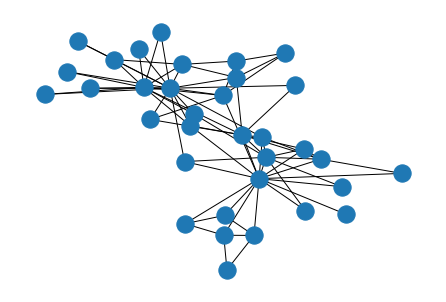

In [26]:
pos = nx.spring_layout(G)
nx.draw(G, pos)

In [27]:
nx.number_connected_components(G)

1

In [28]:
nc.edge_betweenness(G)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

## First clustering function

In [29]:
def updateGraph1(G):

    ebw = nc.edge_betweenness(G)
    maxs = 0

    for k, v in ebw.items():
        if maxs < v:
            medge, maxs = k, v

    G.remove_edge(medge[0], medge[1])

## Second clustering function

In [30]:
def updateGraph2(G):

    ebw = nc.edge_betweenness(G)

    edge_list = sorted(ebw.items(), key=itemgetter(1))

    medge = edge_list[-1][0]

    G.remove_edge(medge[0], medge[1])

## Find the partition into two communities

In [31]:
while nx.is_connected(G):

    # we remove links until the graph is connected
    updateGraph1(G)

In [32]:
communities = [i for i in nx.connected_components(G)]
communities

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [33]:
color_community = []
for i in range(0, len(G)):

    if i in communities[0]:
        color_community.append(0)
    else:
        color_community.append(1)

To compare the results to Figure 4 of the paper by Girvan and Newman nodes' labels must be increased by 1.

In [34]:
H = nx.karate_club_graph()

In [35]:
labels_GN = {}
for i in H:
    labels_GN[i] = i + 1

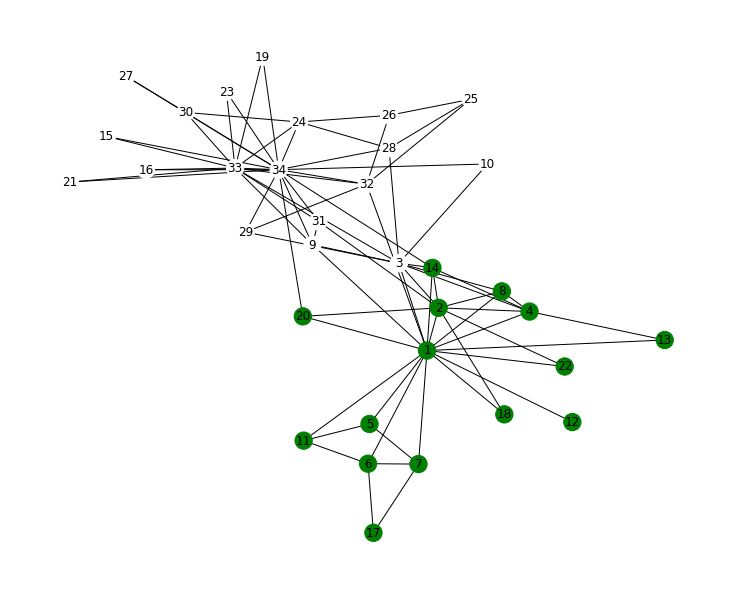

In [36]:
plt.figure(figsize=(10, 8))
nx.draw(
    H,
    pos,
    labels=labels_GN,
    node_color=color_community,
    cmap=plt.cm.ocean,
    with_labels=True,
)